**Estudiante:** Juan Diego Valdivia Mendoza

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Implementación de un Autómata Celular**


## **Desarrollo Teórico**

Un autómata celular es un modelo computacional que consiste en una red de celdas. Cada celda puede estar en uno de un conjunto finito de estados, y su estado cambia a lo largo del tiempo según una regla local que depende del estado de las celdas vecinas.

En este caso, implementaremos un autómata celular unidimensional, donde el estado de una celda en el tiempo siguiente se determina por el estado actual de la celda y sus dos vecinos inmediatos (izquierda y derecha). La regla de selección para este autómata está dada en el Cuadro 1, que define el estado futuro de la celda en función de los estados actuales.

## **Regla de Selección**

La regla se implementa según la tabla proporcionada:

| Celda Izquierda | Celda Actual | Celda Derecha | Nueva Celda Actual |
|------------------|--------------|---------------|--------------------|
| 0                | 0            | 0             | 0                  |
| 0                | 0            | 1             | 1                  |
| 0                | 1            | 0             | 1                  |
| 0                | 1            | 1             | 1                  |
| 1                | 0            | 0             | 1                  |
| 1                | 0            | 1             | 0                  |
| 1                | 1            | 0             | 0                  |
| 1                | 1            | 1             | 0                  |

## **Implementación en Python**

In [2]:
# Regla de selección como un diccionario
rule_dict = {
    (0, 0, 0): 0,
    (0, 0, 1): 1,
    (0, 1, 0): 1,
    (0, 1, 1): 1,
    (1, 0, 0): 1,
    (1, 0, 1): 0,
    (1, 1, 0): 0,
    (1, 1, 1): 0
}

In [3]:

# Función para calcular la siguiente generación
def next_generation(current_gen):
    new_gen = []
    n = len(current_gen)

    for i in range(n):
        left = current_gen[i - 1] if i > 0 else current_gen[-1]  # Celda izquierda (considerar borde como cíclico)
        center = current_gen[i]  # Celda actual
        right = current_gen[i + 1] if i < n - 1 else current_gen[0]  # Celda derecha

        # Aplicar regla de selección
        new_gen.append(rule_dict[(left, center, right)])

    return np.array(new_gen)

# Función para ejecutar el autómata celular
def cellular_automaton(initial_gen, steps):
    generations = [initial_gen]

    for _ in range(steps):
        new_gen = next_generation(generations[-1])
        generations.append(new_gen)

    return np.array(generations)

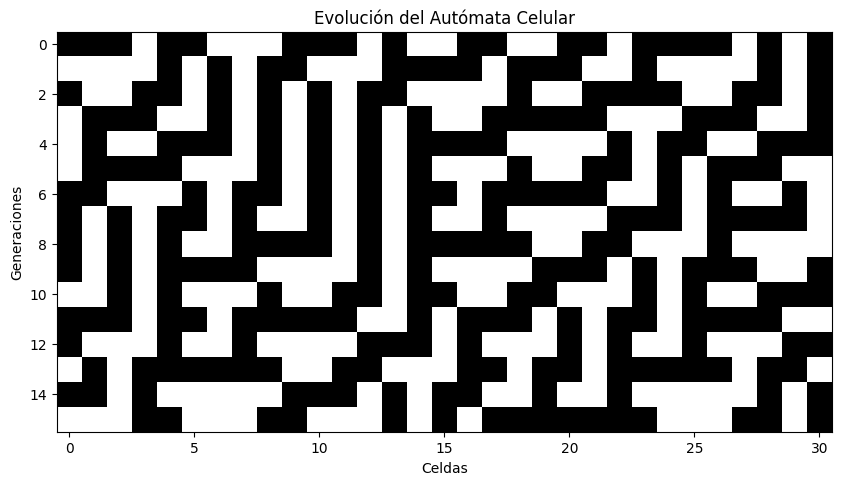

In [5]:
size = 31  # Número de celdas
steps = 15  # Número de generaciones

initial_gen = np.random.choice([0, 1], size=size)

result = cellular_automaton(initial_gen, steps)

plt.figure(figsize=(10, 6))
plt.imshow(result, cmap="binary", interpolation="nearest")
plt.title("Evolución del Autómata Celular")
plt.xlabel("Celdas")
plt.ylabel("Generaciones")
plt.show()

### **Explicación del Código**

1. **Definición de la regla de selección**:
   - Usamos un diccionario donde las claves son las combinaciones de estados (izquierda, actual, derecha) y los valores son los estados futuros de la celda.

2. **Cálculo de la siguiente generación**:
   - Para cada celda, determinamos el estado de sus vecinos izquierdo y derecho. Si estamos en los bordes, consideramos las celdas como cíclicas (la última conecta con la primera).
   - Aplicamos la regla de selección para determinar el nuevo estado de la celda.

3. **Ejecución del autómata**:
   - Iniciamos con una generación inicial aleatoria.
   - Iteramos por el número de pasos especificado, calculando nuevas generaciones y almacenándolas.

4. **Visualización**:
   - Usamos `matplotlib` para representar la evolución del autómata celular como una matriz binaria, donde cada celda es un píxel blanco (estado 1) o negro (estado 0).

## **Resultados**

El resultado del autómata celular se muestra en un gráfico, donde cada fila representa una generación, y las columnas representan las celdas. El patrón emergente ilustra la dinámica del sistema según la regla de selección.

## **Conclusiones**

- Los autómatas celulares son herramientas poderosas para modelar sistemas dinámicos complejos.
- La implementación en Python nos permite explorar patrones y dinámicas generadas por reglas simples.
- La regla de selección aplicada muestra cómo pequeñas variaciones en los estados iniciales pueden producir patrones diversos y complejos.

Este informe proporciona una base para explorar aplicaciones más avanzadas de autómatas celulares en diversas disciplinas, como física, biología y ciencias de la computación.